# Introduction

You have definitely seen various graphs, maps and drawings made from python or in this blog. "What is used to plot these graphics?" You may ask. Well, there are a variety of drawing packages in Python, from Bokeh, Cartopy, Plotly and the like. However, one of the oldest, and most used is matplotlib. [Matplotlib](https://matplotlib.org/) is a package for drawing visualizations in python. Here are some functions of matplotlib:

<ul>
    <li>Create publication quality plots.</li>
    <li>Make interactive figures that can zoom, pan, update.</li>
    <li>Customize visual style and layout.</li>
    <li>Export to many file formats.</li>
    <li>Embed in JupyterLab and Graphical User Interfaces.</li>
    <li>Use a rich array of third-party packages built on Matplotlib.</li>
    </ul>
  
Today we shall look at some of the most basic functions of matplotlib. We shall draw scatterplots and a map from matplotlib. The latter is not the best of functions that the package can do, but it will do. You can think of matplotlib as a **Mat**h **Plot**ting **Lib**rary. 

## Plotting a scatterplot

We shall use matplotlib to create a scatterplot of a geodataframe. The geodataframe is a shapefile containing the COVID-19 cases in some of the counterminous United States. We shall use matplotlib to plot the COVID-19 cases occurring in the counterminous USA. The dataset is downloadable from [here](https://coronavirus-resources.esri.com/datasets/628578697fb24d8ea4c32fa0c5ae1843_0.zip?outSR=%7B%22latestWkid%22:4326,%22wkid%22:4326%7D). It was used in this R exercise (https://www.lifeingis.com/wp-admin/post.php?post=13751&action=edit). However, it seems it has been updated to 2023. Download it from [here](https://www.weather.gov/source/gis/Shapefiles/County/s_22mr22.zip).

Let's first load in the usual tools of trade necessary for any python data science exercise.

In [1]:
#import necessary modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [2]:
# Import the covid 19 dataset, its a shapefile
# Import shapefile using geopandas
path = "E:/documents/gis800_articles/jupyter/heatmaps_python/COVID-19_Cases_US"
usa_covid = gpd.read_file(os.path.join(path, "COVID-19_Cases_US.shp")) # Use os.path from os package to access the path

Let's see what the `usa_covid` shapefile has to offer.

In [3]:
# Read the first few lines of the usa_covid shapefile attribute table
usa_covid.head()

,OBJECTID,Province_S,Country_Re,Last_Updat,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_K,Incident_R,People_Tes,People_Hos,UID,ISO3,geometry
0,1,Alabama,US,2023-02-03,32.539527,-86.644082,19530,None,230,None,Autauga,01001,"Autauga, Alabama, US",34956.773882,None,None,84001001,USA,POINT (-86.64408 32.53953)
1,2,Alabama,US,2023-02-03,30.727750,-87.722071,69187,None,723,None,Baldwin,01003,"Baldwin, Alabama, US",30993.038695,None,None,84001003,USA,POINT (-87.72207 30.72775)
2,3,Alabama,US,2023-02-03,31.868263,-85.387129,7339,None,103,None,Barbour,01005,"Barbour, Alabama, US",29729.401280,None,None,84001005,USA,POINT (-85.38713 31.86826)
3,4,Alabama,US,2023-02-03,32.996421,-87.125115,7967,None,109,None,Bibb,01007,"Bibb, Alabama, US",35576.493704,None,None,84001007,USA,POINT (-87.12511 32.99642)
4,5,Alabama,US,2023-02-03,33.982109,-86.567906,18349,None,261,None,Blount,01009,"Blount, Alabama, US",31731.401100,None,None,84001009,USA,POINT (-86.56791 33.98211)


Before we dive in to creating a matplotlib graph of the above dataset, specifically for the confirmed cases, we have to understand the framework of matplotlib's functionality. 

![Framework for matplotlib](https://static.javatpoint.com/tutorial/matplotlib/images/general-concept-of-matplotlib.png)

As you can see, for any matplotlib graphic or figure, there has to by xy labels, xy axes, a title, the entire cartesian scale (axes). All these are encapsulated inside the *figure*. Here is a description of each of these terms.

<ul>
<li>Figure: It is a whole figure which may hold one or more axes (plots). We can think of a Figure as a canvas that holds plots.</li>

<li>Axes: A Figure can contain several Axes. It consists of two or three (in the case of 3D) Axis objects. Each Axes is comprised of a title, an x-label, and a y-label.</li>

<li>Axis: Axises are the number of line like objects and responsible for generating the graph limits.</li>

<li>Artist: An artist is the all which we see on the graph like Text objects, Line2D objects, and collection objects. Most Artists are tied to Axes.</li>
    </ul>

The matplotlib website says it exists to make simple things easy and hard things possible. The issue is, there seems to be no overarching code structure for using matplotlib. From experience, so long as you know what you are doing, you can manipulate matplotlib's functions in any way to draw a graphic. However, we don't like coding by rule (as some are often to do) but rather by reason. So let's start simple to understand the big picture.

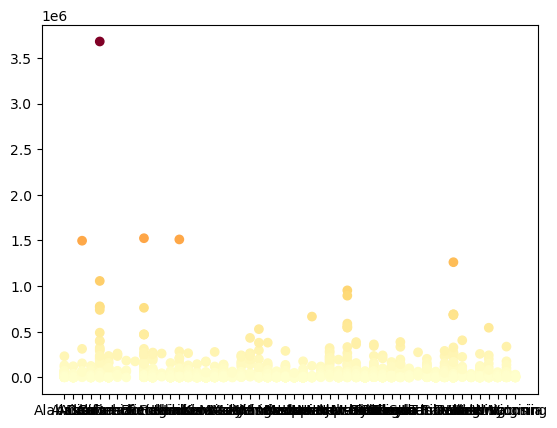

In [4]:
# Plot number of confirmed cases for USA with matplotlib
x = usa_covid['Province_S']  # Assign x to x-axis
y = usa_covid['Confirmed']  # Assign y to y-axis

plt.scatter(x, y, c=usa_covid['Confirmed'], cmap='YlOrRd')

If you were keen, you will have noticed that we assigned the `x` variable to the values in `Province_S` column which contains the states in the contiguous USA. The names of these states on the x axis are for one, squeezed, an issue we attribute to them being horizontally rather than vertically placed. To make the names legible without going into painful exercises of increasing font and yaddah yaddah, let's just rotate the labels by 90 degrees.

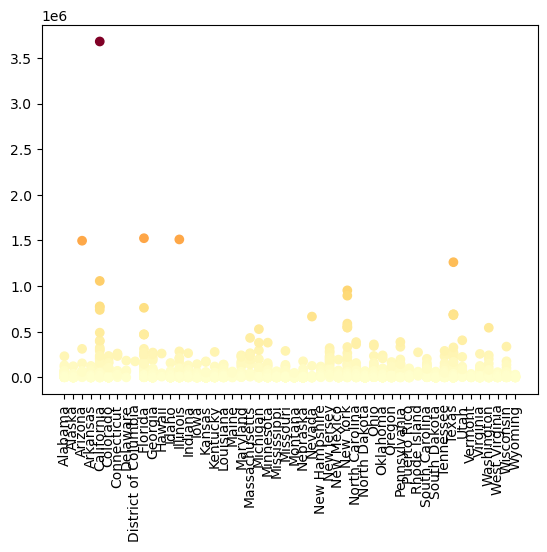

In [5]:
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
x = usa_covid['Province_S']
y = usa_covid['Confirmed']

plt.xticks(rotation=90) # xticks is a function that deals with x axis
plt.scatter(x, y, c=usa_covid['Confirmed'], cmap='YlOrRd')

Look's better? Definitely. However, we are still struggling to read the state names, and it this will be far worse to any visually impaired person who may come across this article. Let's go easy on our eyes and space out the scatterplot. 

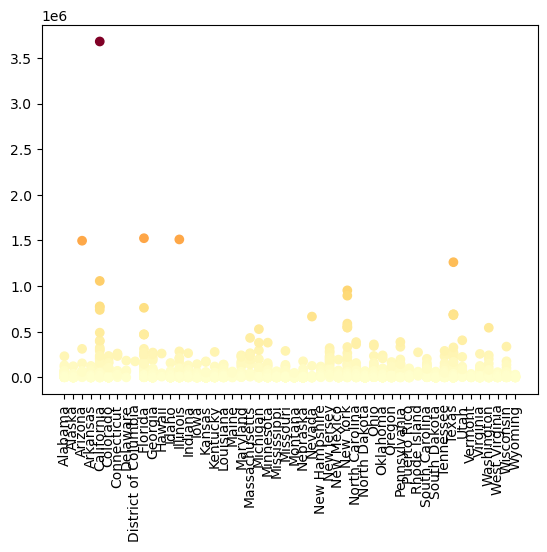

In [6]:
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
%matplotlib inline
x = usa_covid['Province_S']
y = usa_covid['Confirmed']

plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (15,8) # Used rcparams to set figure size as sourced from here: 
# https://www.tutorialspoint.com/how-to-plot-single-data-with-two-y-axes-two-units-in-matplotlib?utm_source=pocket_reader
plt.scatter(x, y, c=usa_covid['Confirmed'], cmap='YlOrRd')
# Couldn't find an easy way to increase x axis spacing except making the figure bigger

Yay! We created a easy-to-read, larger than life matplotlib figure! However, each label on the x axis contains the number of recorded COVID-19 cases at each particular location within that state. You will notice that in the dataset, each row of COVID data per state also includes the Lon-Lat coordinates for where the COVID-19 infection was recorded. Our next purpose is to create a scatterplot that shows the aggregated number of COVID-19 cases in each state. Taking Alabama as an example, we want the total number of COVID-19 cases in Alabama, not the individual cases at particular sites within that state. Having such kind of data will help us know which state was a COVID-19 hotspot and which were, ironically, coldspots for this disease.

But how do we aggregate. Consider aggregation as summising, or summarizing based on a given criteria. In our case, we want the total COVID-19 statistics for each COVID-19 criteria. So, our dataset should have total confirmed, recovered, or deaths values for each state. One problem though, to conduct this changes, our dataset, the `usa_covid`, must be a dataframe, not a *geodataframe*. Time for some conversion.

In [7]:
# Aggregate the data
# First convert to dataframe
usa_covid_df = pd.DataFrame(usa_covid)

Check out the dataframe `usa_covid_df`.

In [8]:
# Check if creation of dataframe succeeded
usa_covid_df.head()

,OBJECTID,Province_S,Country_Re,Last_Updat,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_K,Incident_R,People_Tes,People_Hos,UID,ISO3,geometry
0,1,Alabama,US,2023-02-03,32.539527,-86.644082,19530,None,230,None,Autauga,01001,"Autauga, Alabama, US",34956.773882,None,None,84001001,USA,POINT (-86.64408 32.53953)
1,2,Alabama,US,2023-02-03,30.727750,-87.722071,69187,None,723,None,Baldwin,01003,"Baldwin, Alabama, US",30993.038695,None,None,84001003,USA,POINT (-87.72207 30.72775)
2,3,Alabama,US,2023-02-03,31.868263,-85.387129,7339,None,103,None,Barbour,01005,"Barbour, Alabama, US",29729.401280,None,None,84001005,USA,POINT (-85.38713 31.86826)
3,4,Alabama,US,2023-02-03,32.996421,-87.125115,7967,None,109,None,Bibb,01007,"Bibb, Alabama, US",35576.493704,None,None,84001007,USA,POINT (-87.12511 32.99642)
4,5,Alabama,US,2023-02-03,33.982109,-86.567906,18349,None,261,None,Blount,01009,"Blount, Alabama, US",31731.401100,None,None,84001009,USA,POINT (-86.56791 33.98211)


Let's now do the aggregation. We shall create a duplicate data frame. In the book of Ecclesiastes in the Bible, hang on, don't skip, it says "Two are better than one, for if one falls, the other is able to pick him up..." and in my zen of python, I say, "Two are better than one, for if one fails, the other is able to stand for it..". We know it doesn't sound outstanding, but having two versions of the same dataset is a sure lifesaver in times of python trouble.

In [9]:
# Lets aggregate data by the states in Province_S and get the sum of all confirmed and deaths cases
# Let's first create a duplicate data frame
usa_covid_df2 = usa_covid_df

Now let's aggregate. We have used `groupby` to select the column to aggregate (summise) our values by. The method `.sum()` does the summation and assigns the values to the respective columns selected by `groupby`. In our case, only the `Province_S` column shall be used for grouping. 

In [10]:
# Save the aggregation formula to an object. We could remove unnecessary columns before aggregation but in matplotlib 
# we only plot what we specify

usa_covid_df_sum = usa_covid_df2.groupby(['Province_S']).sum()
usa_covid_df_sum.head()

C:\Users\gachuhi\AppData\Local\Temp\ipykernel_16808\3682347871.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usa_covid_df_sum = usa_covid_df2.groupby(['Province_S']).sum()


,OBJECTID,Lat,Long_,Confirmed,Deaths,Incident_R,UID
Province_S,,,,,,,
Alabama,2297,2203.246784,-5809.578199,1617850,20882,2.167140e+06,5628071489
Alaska,2464,1690.219784,-4168.804624,304368,1473,1.265786e+06,2436150045
Arizona,1627,505.138555,-1671.948482,2401287,32882,5.207913e+05,1260060208
Arkansas,11818,2618.391704,-6932.548370,997101,12875,2.374323e+06,6384470630
California,13186,2194.949775,-7002.258461,12005616,100301,1.564707e+06,4956441370


In our resulting aggregate dataframe, the `Province_S` column field is an index. You can know this by its name appearing at a lower level compared to the other column headers. This `Province_S` column will cause errors when assigning it to the x-axis. Don't ask, we experienced it for you. Nevertheless, python cannot lack a function to [convert the index](https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/?utm_source=pocket_saves) to a regular column. On such function is `reset_index()`.

In [11]:
# Make the index column become a normal column
usa_covid_df_sum = usa_covid_df_sum.reset_index()
usa_covid_df_sum.head()

,Province_S,OBJECTID,Lat,Long_,Confirmed,Deaths,Incident_R,UID
0,Alabama,2297,2203.246784,-5809.578199,1617850,20882,2.167140e+06,5628071489
1,Alaska,2464,1690.219784,-4168.804624,304368,1473,1.265786e+06,2436150045
2,Arizona,1627,505.138555,-1671.948482,2401287,32882,5.207913e+05,1260060208
3,Arkansas,11818,2618.391704,-6932.548370,997101,12875,2.374323e+06,6384470630
4,California,13186,2194.949775,-7002.258461,12005616,100301,1.564707e+06,4956441370


Let's now plot our aggregated data!

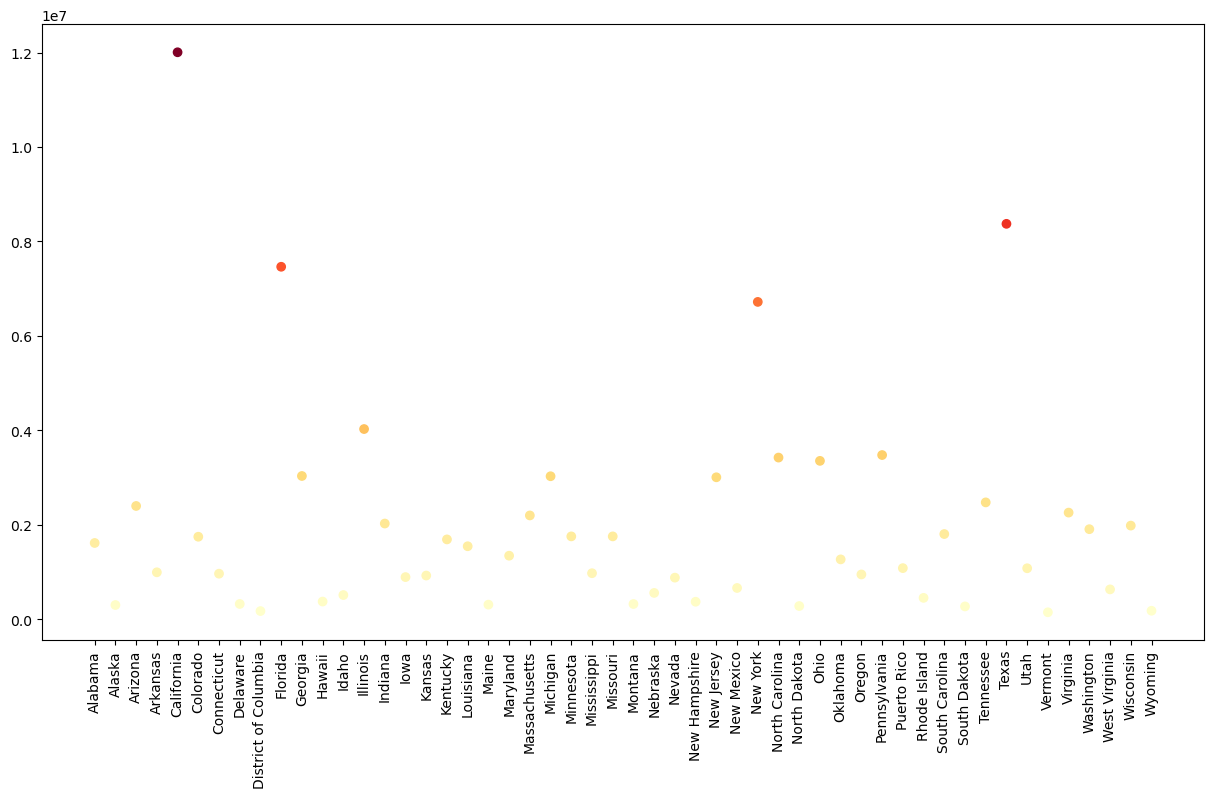

In [12]:
# Plot the aggregated data
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
%matplotlib inline
x = usa_covid_df_sum['Province_S']
y = usa_covid_df_sum['Confirmed']

plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x, y, c=usa_covid_df_sum['Confirmed'], cmap='YlOrRd')

# Couldn't find an easy way to increase x axis spacing except making the figure bigger

I am sure you may have noticed it from the name. The method `.scatter` does the plotting of the scatterplot for us.

One down, two to go. We want to draw a scatter plot with two Y variables. One for `Confirmed` cases, and the other for `Deaths` column values. Here is the solution.

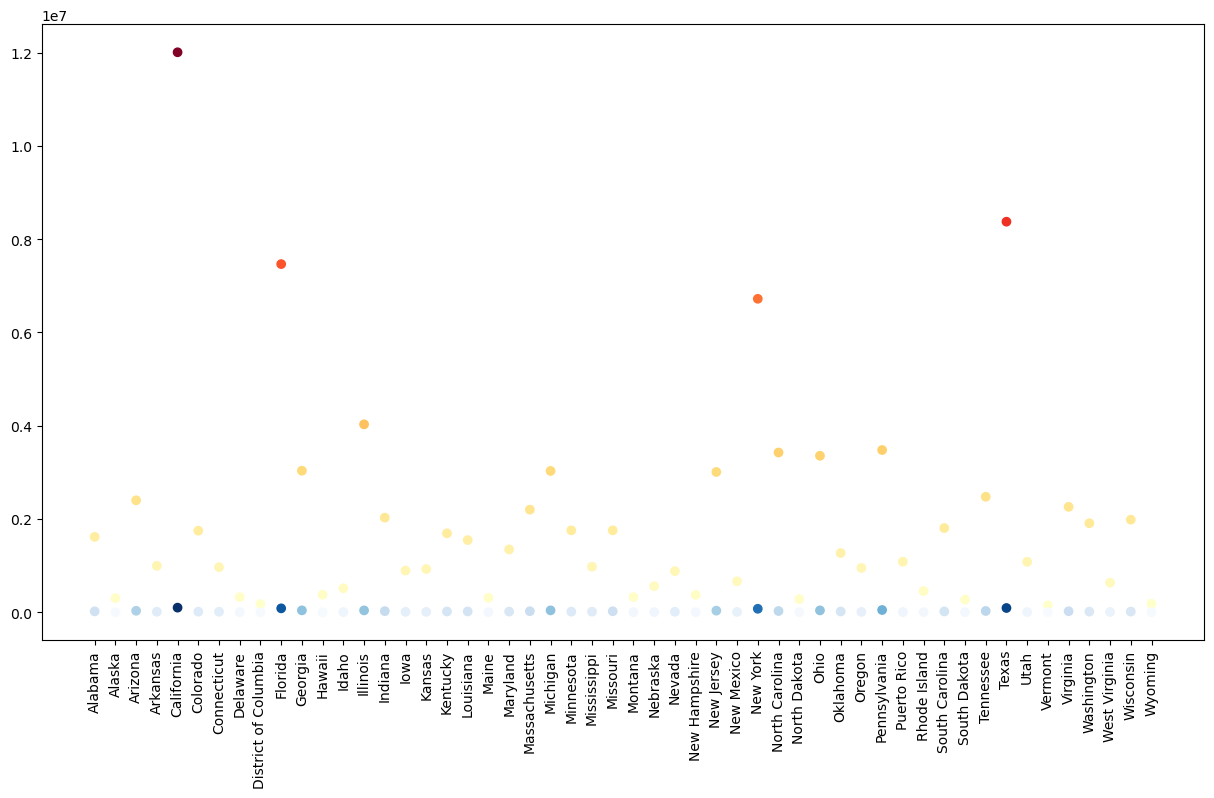

In [13]:
# Plot the aggregated data
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
x = usa_covid_df_sum['Province_S']
y = usa_covid_df_sum['Confirmed']

x1 = usa_covid_df_sum['Province_S']
y1 = usa_covid_df_sum['Deaths']

plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x, y, c=usa_covid_df_sum['Confirmed'], cmap='YlOrRd')
plt.scatter(x1, y1, c=usa_covid_df_sum['Deaths'], cmap='Blues')
# Couldn't find an easy way to increase x axis spacing except making the figure bigger

There seems to be more than one way to kill a rat in drawing plots with matplotlib. As per the  reference, you can set the `.scatter` method to the axes.

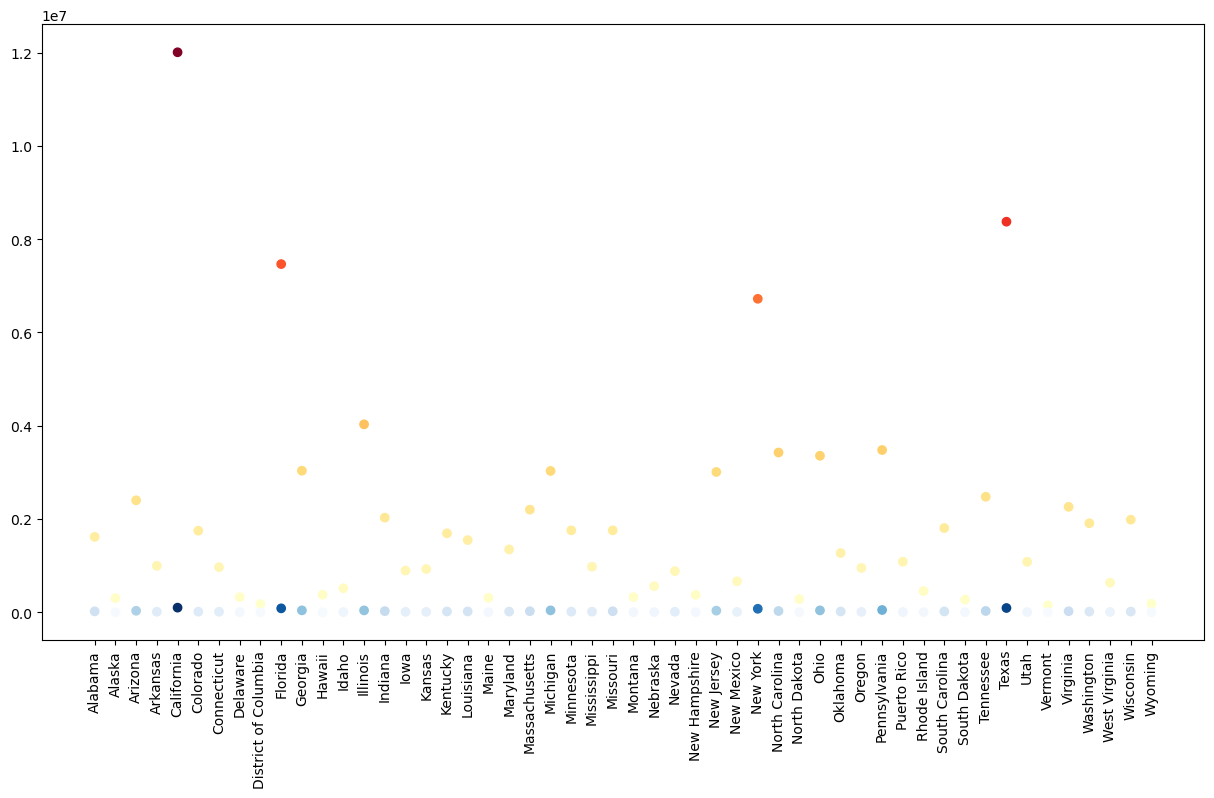

<Figure size 1500x800 with 0 Axes>

In [14]:
# Plot the aggregated data
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
x = usa_covid_df_sum['Province_S']
y = usa_covid_df_sum['Confirmed']

x1 = usa_covid_df_sum['Province_S']
y1 = usa_covid_df_sum['Deaths']

fig, ax = plt.subplots()

# plt.xticks(rotation=90)
plt.xticks(rotation=90)

# plt.rcParams["figure.figsize"] = (15,8)
plt.figure(figsize=(15, 8))

ax.scatter(x, y, c=usa_covid_df_sum['Confirmed'], cmap='YlOrRd')
ax.scatter(x1, y1, c=usa_covid_df_sum['Deaths'], cmap='Blues')
plt.show()
# plt.ticklabel_format(style='plain') # This is supposed to remove the scientific notation on y-axis but it ain't working
# Couldn't find an easy way to increase x axis spacing except making the figure bigger

Our only wish is if we could find a way to make the `ticklabel_format` method remove the scientific notation of our y-values. Unfortunately, by the time of going to print, we had not succeeded. But here is a distraction: using matplotlib we can create two or even more scatterplots within the same *figure*.

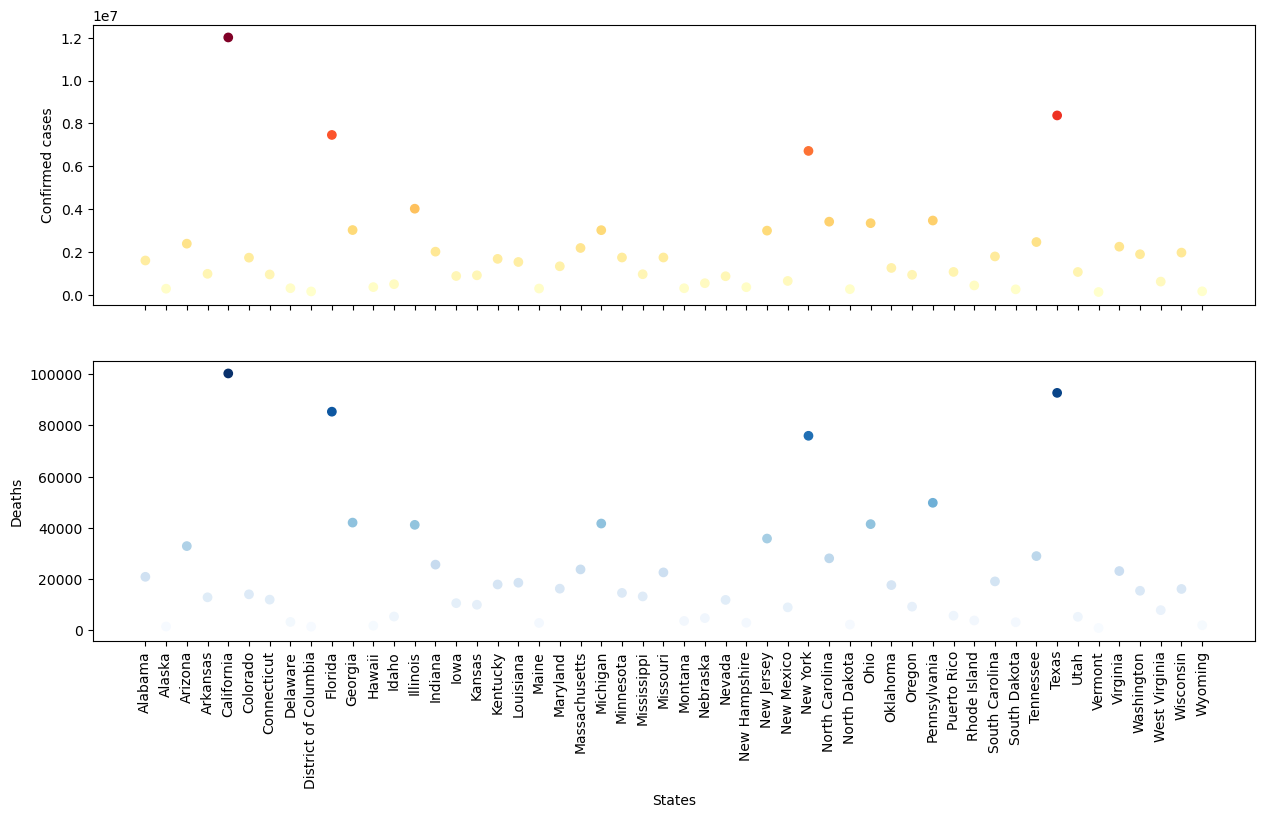

In [15]:
# Plot the aggregated data
# Make the state names slant vertically
# Plot number of confirmed cases for USA with matplotlib
x = usa_covid_df_sum['Province_S']
y = usa_covid_df_sum['Confirmed']

x1 = usa_covid_df_sum['Province_S']
y1 = usa_covid_df_sum['Deaths']

fig, ax = plt.subplots(2,1,sharex=True)

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel("Confirmed cases")
plt.scatter(x, y, c=usa_covid_df_sum['Confirmed'], cmap='YlOrRd')

plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel("Deaths")
plt.xlabel("States")
plt.scatter(x1, y1, c=usa_covid_df_sum['Deaths'], cmap='Blues')


## Plotting a map

Now to the last big thing. Plotting a map of contigous USA showing the COVID-19 infections so far. Obviously a shapefile, this [shapefile](https://www.weather.gov/source/gis/Shapefiles/County/s_22mr22.zip) has to be loaded, but it does not have the COVID-19 cases. This is an easy to solve problem, though. Just join the relevant data columns from our aggregated dataset (`usa_covid_df_sum`) to the shapefile. 

First, let's drop the unnecessary columns from our `usa_covid_df_sum` dataset. 

In [16]:
# Read the column heads within our aggregated dataset
usa_covid_df_sum.columns

Index(['Province_S', 'OBJECTID', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Incident_R', 'UID'],
      dtype='object')

Let's drop the unnecessary columns. `Lat`, `Long_`, `Incident_R` and `Incdent_R` are our sacrifical lambs for today.

In [17]:
# Drop the unnecessary columns
usa_covid_df_sum = usa_covid_df_sum.drop(['Lat', 'Long_', 'Incident_R', 'UID'], axis=1)
usa_covid_df_sum.head()

,Province_S,OBJECTID,Confirmed,Deaths
0,Alabama,2297,1617850,20882
1,Alaska,2464,304368,1473
2,Arizona,1627,2401287,32882
3,Arkansas,11818,997101,12875
4,California,13186,12005616,100301


Let's load the shapefile before merging it with the infections dataset of `usa_covid_df_sum`.

In [18]:
# Import USA administrative shapefile
path_2 = "E:/documents/gis800_articles/jupyter/heatmaps_python"
usa_adm = gpd.read_file(os.path.join(path_2, "usa_map", "s_22mr22.shp"))

# Check attributes of USA shapefile
usa_adm.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


Now let's merge the two! We will use the `join` function to join both the shapefile and dataframe by common column values. In our case, the `NAME` column of `usa_adm_merged` and the `Province_S` column of `usa_covid_df_sum` each contain the names of US states. The function `set_index` will set the column values of each of the two dataset as a reference value for proper placement during the `join`ning process.  

In [19]:
# Merge shapefile with computed sum of confirmed cases and deaths
usa_adm_merged = usa_adm.set_index('NAME').join(usa_covid_df_sum.set_index('Province_S')) # set_index sets a particular column as index, 
# which in this case will be to engender the join function

usa_adm_merged.head()

,STATE,FIPS,LON,LAT,geometry,OBJECTID,Confirmed,Deaths
NAME,,,,,,,,
Alaska,AK,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",2464.0,304368.0,1473.0
Alabama,AL,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",2297.0,1617850.0,20882.0
Arkansas,AR,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",11818.0,997101.0,12875.0
American Samoa,AS,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",NaN,NaN,NaN
Arizona,AZ,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",1627.0,2401287.0,32882.0


Let's convert the Coordinate Reference System (CRS) of this shapefile to a global CRS.

Let's change our shapefile to a global CRS, such as EPSG:4326.


In [20]:
# Change to CRS EPSG: 4326
usa_adm_merged.to_crs("EPSG:4326")
usa_adm_merged.head()

,STATE,FIPS,LON,LAT,geometry,OBJECTID,Confirmed,Deaths
NAME,,,,,,,,
Alaska,AK,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",2464.0,304368.0,1473.0
Alabama,AL,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",2297.0,1617850.0,20882.0
Arkansas,AR,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",11818.0,997101.0,12875.0
American Samoa,AS,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773...",NaN,NaN,NaN
Arizona,AZ,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",1627.0,2401287.0,32882.0


In [21]:
# Read the crs of our transformed geodataframe - usa_adm_merged
usa_adm_merged.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

We now close this session with a map of confirmed COVID-19 cases in USA as of 2023.  

In [22]:
# Find out the number of rows
len(usa_adm_merged)

59

In [23]:
# Drop those rows with null values (NaN) in Confirmed column
usa_adm_merged = usa_adm_merged.dropna(subset=['Confirmed'])

# Find out the length of the dataframe after droping NaN values
len(usa_adm_merged)

52

The final masterpiece, a map showing the COVID-19 cases in the USA. One way to do it is through this...

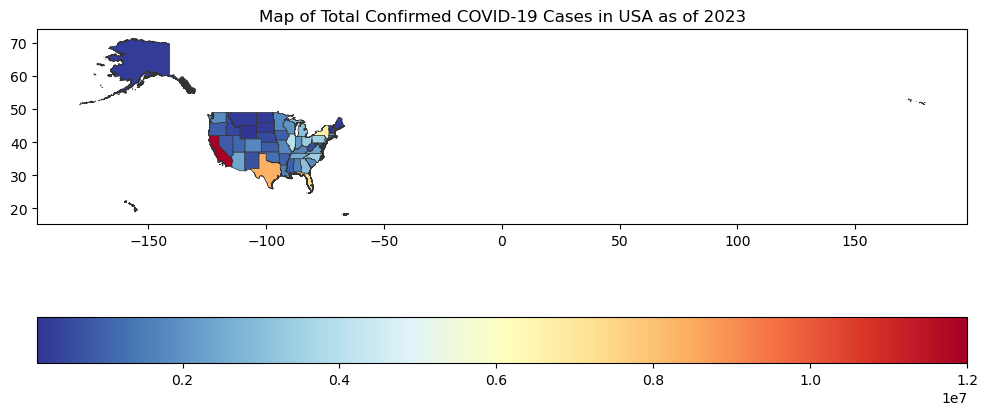

In [24]:
# Plot map of USA covid infections
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Map of Total Confirmed COVID-19 Cases in USA as of 2023")
fig = usa_adm_merged.plot(column='Confirmed', 
                          cmap='RdYlBu_r', 
                          linewidth=0.5, 
                          ax=ax, 
                          edgecolor='0.2', 
                          legend=True, 
                          legend_kwds={'orientation': 'horizontal'})

...or this.

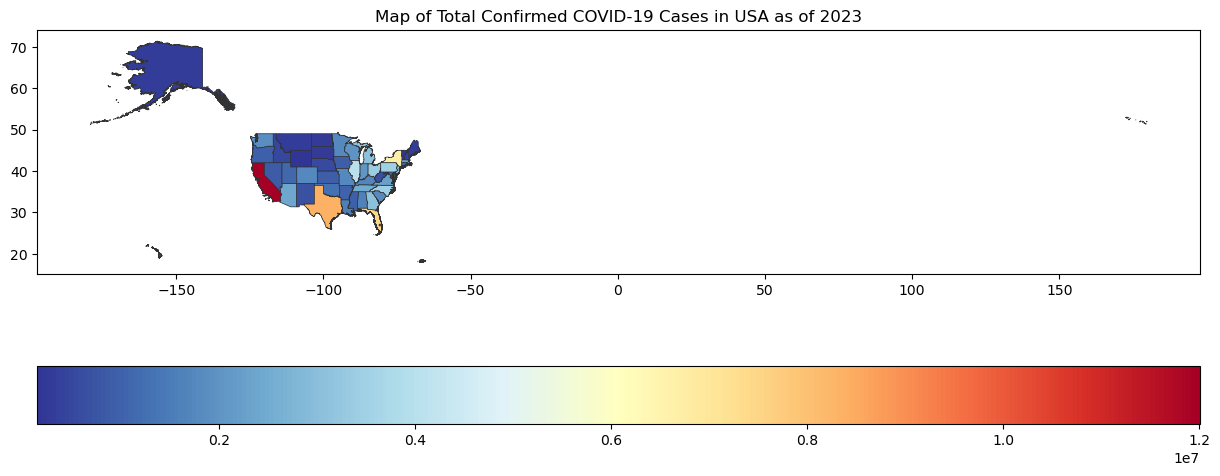

In [25]:
# Another to draw a matplotlib lab by setting the dataset to an ax
ax = usa_adm_merged.plot()
usa_adm_merged.plot(column='Confirmed', 
                          cmap='RdYlBu_r', 
                          linewidth=0.5, 
                          ax=ax, 
                          edgecolor='0.2', 
                          legend=True, 
                          legend_kwds={'orientation': 'horizontal'})

ax.set_title("Map of Total Confirmed COVID-19 Cases in USA as of 2023")

plt.show()

There are so many conventions for plotting in matplotlib we are at a loss which is the best one to use.

# Conclusion

We have seen that matplotlib is useful in drawing graphs for either a dataframe or geodataframe. In both, the conventions of drawing a statistical chart, such as a scatterplot, are the same for the geodataframe as they are for the dataframe. When it comes to manipulating the data, however, it is best to convert the geodataframe to a dataframe to perform the mathematical calculations. Finally, matplotlib can also draw static maps, as was the case in our final example. 